# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

**Douglas Wirtz**

**Jan. 08, 2017**

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
import csv

# Ensure there is an output for every input(image)
assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

# Number of training samples
n_train = len(X_train)

# Number of testing samples
n_test = len(X_test)

# What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(open("signnames.csv").readlines()[1:])

print("Number of training samples =", n_train)
print("Number of testing samples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training samples = 39209
Number of testing samples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

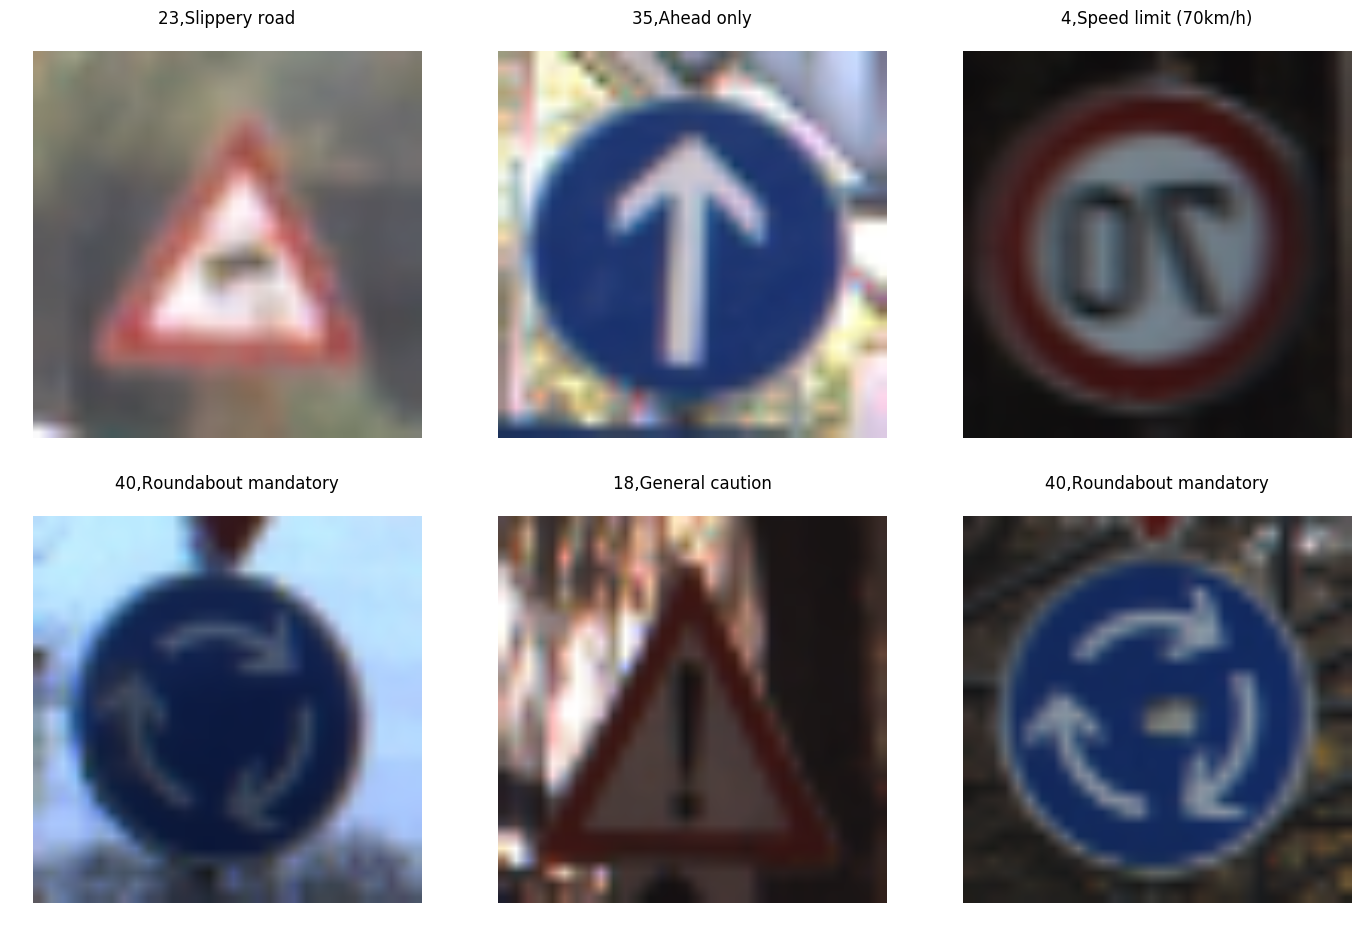

In [7]:
# Print random images from the data with its label
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (17, 17))

for i in range(6):
    index = random.randint(0, n_classes-1)
    image = random.choice(X_train[y_train == index])
    image = np.fliplr(image)
    plt.subplot(3, 3, i+1).set_title(open("signnames.csv").readlines()[index+1])
    plt.imshow(image)
    plt.axis("off")

In [4]:
# Print the count of each sign
sum_y_train = 0
with open("signnames.csv") as f:
    class_list = list(csv.reader(f))
for index in range(len(class_list)):
    if index == 0:
        print("ID", "Sign Name", 5*"\t", "Count", sep = "\t")
    else:
        print(class_list[index][0], class_list[index][1], (55 - len(class_list[index][1]))*" ", np.sum(y_train == index-1), sep = "\t")
        sum_y_train += np.sum(y_train == index-1)
print()
print("Total Sample Count =", sum_y_train)

ID	Sign Name							Count
0	Speed limit (20km/h)	                                   	210
1	Speed limit (30km/h)	                                   	2220
2	Speed limit (50km/h)	                                   	2250
3	Speed limit (60km/h)	                                   	1410
4	Speed limit (70km/h)	                                   	1980
5	Speed limit (80km/h)	                                   	1860
6	End of speed limit (80km/h)	                            	420
7	Speed limit (100km/h)	                                  	1440
8	Speed limit (120km/h)	                                  	1410
9	No passing	                                             	1470
10	No passing for vehicles over 3.5 metric tons	           	2010
11	Right-of-way at the next intersection	                  	1320
12	Priority road	                                          	2100
13	Yield	                                                  	2160
14	Stop	                                                   	780
15	No vehicle

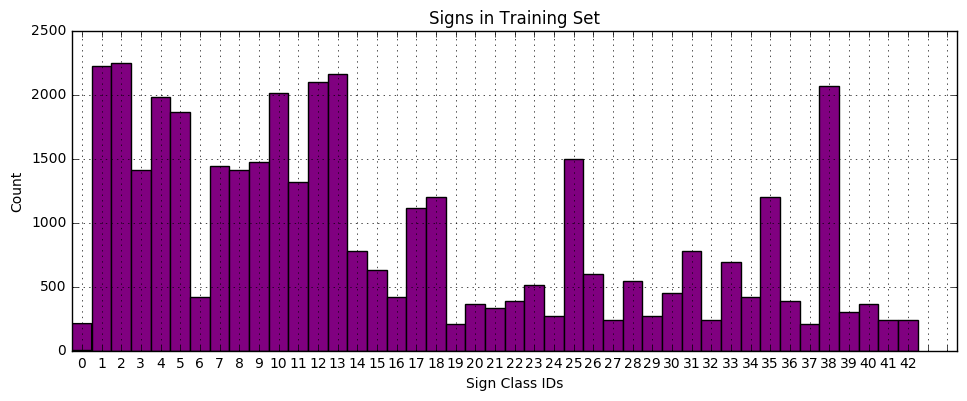

In [5]:
#Plot the counts
plt.hist(y_train, np.arange(0, 44, 1.0), facecolor="purple")
plt.subplots_adjust(bottom=0.1, right=1.6, top=0.9)
plt.xticks(np.arange(45)+0.5, np.arange(0,43))
plt.xlabel("Sign Class IDs")
plt.ylabel("Count")
plt.title("Signs in Training Set")
plt.grid(True)

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
# This function for image transformation is based on one provided by Vivek Yadav
import cv2
def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

In [7]:
# Generate fake data
with open("signnames.csv") as f:
    class_list = list(csv.reader(f))
    
sum_y_train = 0

for index in range(len(class_list)):
    #reset variables 
    generated_images = []
    generated_labels = []
    count = 0
    
    if index == 0:
        print("ID", "Sign Name", 5*"\t", "Count", sep = "\t")
    else:
        while count < 3000 - np.sum(y_train == index-1):
            image = random.choice(X_train[y_train == index-1])
            for i in range(75):
                img = transform_image(image,20,10,5)
                generated_images.append(img)
                generated_labels.append(index-1)
            count += 75
        X_train = np.concatenate((X_train, generated_images), axis = 0)
        y_train = np.concatenate((y_train, generated_labels), axis = 0)
        print(class_list[index][0], class_list[index][1], (55 - len(class_list[index][1]))*" ", np.sum(y_train == index-1), sep = "\t")
        sum_y_train += np.sum(y_train == index-1)

assert(len(X_train) == len(y_train))
print()
print("Total Sample Count =", sum_y_train)

ID	Sign Name							Count
0	Speed limit (20km/h)	                                   	3060
1	Speed limit (30km/h)	                                   	3045
2	Speed limit (50km/h)	                                   	3000
3	Speed limit (60km/h)	                                   	3060
4	Speed limit (70km/h)	                                   	3030
5	Speed limit (80km/h)	                                   	3060
6	End of speed limit (80km/h)	                            	3045
7	Speed limit (100km/h)	                                  	3015
8	Speed limit (120km/h)	                                  	3060
9	No passing	                                             	3045
10	No passing for vehicles over 3.5 metric tons	           	3060
11	Right-of-way at the next intersection	                  	3045
12	Priority road	                                          	3000
13	Yield	                                                  	3060
14	Stop	                                                   	3030
15	No vehi

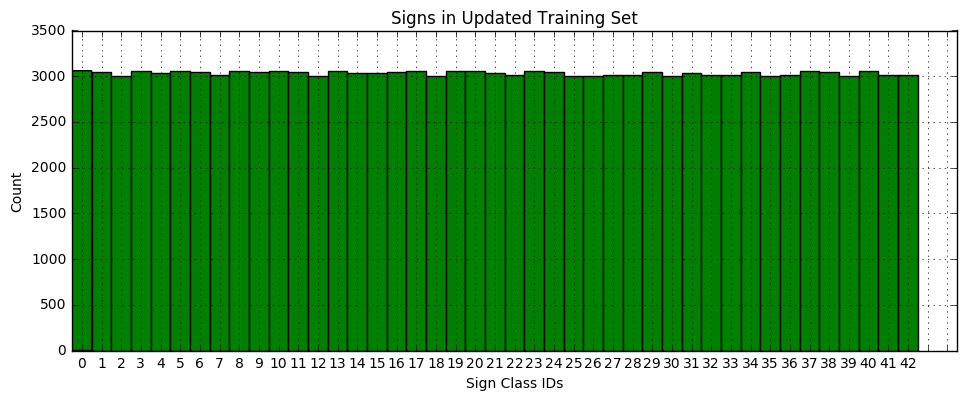

In [8]:
# Plot the updated counts
plt.hist(y_train, np.arange(0, 44, 1.0), facecolor="green")
plt.subplots_adjust(bottom=0.1, right=1.6, top=0.9)
plt.xticks(np.arange(45)+0.5, np.arange(0,43))
plt.xlabel("Sign Class IDs")
plt.ylabel("Count")
plt.title("Signs in Updated Training Set")
plt.grid(True)

plt.show()

In [9]:
# Shuffle training data to prevent ordering bias during training
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [10]:
# Convert X_train and x_test to grayscale
X_train = np.mean(X_train, axis=3, dtype=int)
X_train.resize([X_train.shape[0],X_train.shape[1],X_train.shape[2],1])
X_test = np.mean(X_test, axis=3, dtype=int)
X_test.resize([X_test.shape[0],X_test.shape[1],X_test.shape[2],1])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

The data (X_train, y_train) were preprocessed with a simple shuffle function. Shuffling the data will prevent any ordering bias that might occur while training the model. In addition to shuffling, every dataset (X_train, y_train, X_test, y_test) was converted to grayscale to reduce the time it takes to train the model and also to improve the model's accuracy.

In [11]:
# Split training data (20%) to validation set
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [12]:
# Number of training samples vs validation samples
n_train = len(X_train)

# Number of validation samples
n_validation = len(X_validation)

print("Number of training samples =", n_train)
print("Number of validation samples =", n_validation)

Number of training samples = 104327
Number of validation samples = 26082


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Prior to preprocessing any of the data, I displayed the counts of each sign in the training set and found that there was quite a variation among the counts. I employed an algorithm that randomly selects an image from the training set, transforms the image 75 different ways, and appends the new images to a generated list. This process gets repeated with another random image of the same class until the sign class total is ~3000 images. The generated list for each sign class then gets appended to the X_train and y_train data. The main differences between the old dataset and the new dataset with generated images is that the new set is much larger and each class has roughly the same amount of images. I generated more images to give my model more data to train on (improve accuracy) as well as remove any class bias that might develop during training due to unbalanced counts of sign classes.

With my enlarged dataset, I randomly selected 20% to create a validation set. I didn't make any changes to the testing set (other than the grayscale transformation during data preprocessing).

In [13]:
import tensorflow as tf
import time
from tensorflow.contrib.layers import flatten

def CNN(x):    
    # Hyperparameters (how weights are initialized)
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 300.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 300), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(300))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Dropout.
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 300. Output = 200.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(300, 200), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(200))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout.
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 200. Output = 100.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(200, 100), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(100))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    
    # Activation.
    fc3 = tf.nn.relu(fc3)
    
    # Dropout.
    fc3 = tf.nn.dropout(fc3, keep_prob)

    # Layer 6: Fully Connected. Input = 100. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I built the architecture for my model using the LeNet model as a template. Layers 1-2 of the network are convolutional which pools following the activation. Layers 3-6 are fully connected layers that introduce dropouts following each activation. Introducing the dropouts takes longer to train the model, but it reduces overfitting and eliminates dependencies on any particular activation, forcing the network to learn redundant representations.

In [14]:
# Set EPOCH/BATCH_SIZE
# Values affect the training speed and model accuracy
EPOCHS = 100
BATCH_SIZE = 128

In [15]:
# Set placeholders for a batch of input images and a batch of output labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [16]:
# Set learning rate and training pipeline
rate = 0.001

logits = CNN(x)
softmax = tf.nn.softmax(logits)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y))
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training = optimizer.minimize(loss)

In [17]:
# Function for evaluating loss and accuracy for given dataset
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [18]:
# Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    timer_start = time.time()
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        if (i+1)%2 == 0:
            print("Epoch {}:".format(i+1), "Validation Accuracy = {:.3f}".format(validation_accuracy))
    
    saver.save(sess, "model/model.ckpt")
    timer_end = time.time()
    
    print()
    print("Final Model Accuracy = {:.2f}%".format(validation_accuracy*100), "(Epochs: {};".format(EPOCHS), "Batch Size: {})".format(BATCH_SIZE)) 
    print("Time Elapsed: {:.2f} Minutes".format((timer_end - timer_start)/60))
    print()
    print("Model saved!")

Training...

Epoch 2: Validation Accuracy = 0.142
Epoch 4: Validation Accuracy = 0.383
Epoch 6: Validation Accuracy = 0.510
Epoch 8: Validation Accuracy = 0.598
Epoch 10: Validation Accuracy = 0.643
Epoch 12: Validation Accuracy = 0.689
Epoch 14: Validation Accuracy = 0.708
Epoch 16: Validation Accuracy = 0.738
Epoch 18: Validation Accuracy = 0.768
Epoch 20: Validation Accuracy = 0.779
Epoch 22: Validation Accuracy = 0.789
Epoch 24: Validation Accuracy = 0.804
Epoch 26: Validation Accuracy = 0.811
Epoch 28: Validation Accuracy = 0.822
Epoch 30: Validation Accuracy = 0.833
Epoch 32: Validation Accuracy = 0.836
Epoch 34: Validation Accuracy = 0.838
Epoch 36: Validation Accuracy = 0.841
Epoch 38: Validation Accuracy = 0.838
Epoch 40: Validation Accuracy = 0.845
Epoch 42: Validation Accuracy = 0.855
Epoch 44: Validation Accuracy = 0.857
Epoch 46: Validation Accuracy = 0.854
Epoch 48: Validation Accuracy = 0.860
Epoch 50: Validation Accuracy = 0.851
Epoch 52: Validation Accuracy = 0.867
Epo

In [19]:
# Evaluate the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint("model/"))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.2f}%".format(test_accuracy*100))

Test Accuracy = 90.36%


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the LeNet example as a starting point for my model training. Once all the pipelines and parameters were set, I trained my model using 104327 samples in my training set and 26082 samples in my validation set (after I generated fake data). Using a learning rate of 0.001 and a batch size of 128, I ran the training data through my 6-layer neural network. I had the weights randomly generated with a mean of 0 (mu) and a standard deviation of 0.1 (sigma). The neural network returned the logits which were then used to calculate the cross entropy followed by minimizing the loss via the Adam optimizer. The weights and biases were updated, using a learning rate of 0.001, for 100 epochs. The model was trained using a validation set to test the model's accuracy. Following that, the model was saved and loaded later to evaluate the test set.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

The most important thing to my approach was to be clear and visual with everything I did so that others could follow along. Another big focus of mine was the data. I wanted to make sure that I had data in both quality and quantity to feed into my model. When I saw the wide range of sign class ID counts, I knew I wanted to generate more data. Data generation allowed me to meet my quantity (~130,000 samples) and quality (~3,000 samples/class ID - reduce class bias during training) goals. The final thing that I thought was necessary to do with my data was to convert my data (and testing data) to grayscale. Becuase I was feeding so much data through my model, I thought grayscale was necessary to reduce training time and improve accuracy. 

The overall process of tuning the parameters was a lot of trial and error. When building the model and testing the code, I kept the epochs around 5-10 and didn't run the code to generate additional data. That allowed me to get a feel for how I thought the model was developing. I decided to leave the batch size at 128, mainly because I trained this on my own PC and I had to keep it within the limits. I had mu = 0 and sigma = 0.1 because I thought it was best to initialize the weights and biases at small random numbers. My learning rate (the rate at which the weights and biases are updated) was 0.001 becuase that is known to be a great default value for slowly training a model. To round out my focus of the quality of data, I knew I wanted to implement dropout in my network, forcing my model to develop redundant representations. 

After the tuning, trial, and error, I generated my additional data, set the epochs to 100 and left the model to train. At the end of 100 epochs, the final accuracy of my model was 88.79%. I believe if I had faster computing power, I could increase the accuracy of the model by increasing the epochs. I loaded my model to evaluate the test data and found it to 90.36% accurate on the test data. With the test dataset having a higher accuracy than the validation sets in my model, I'd say that the model can generalize pretty well. Another thing to note is that the model accuracy and the test accuracy are fairly close. This is good because that means the model isn't overfitting the training data.

In summary, I wanted to focus on the quality and quantity of my data as well as my data preprocessing. In addition, I wanted to focus on my data visualizations (as seen with the graphs above and below) to give insight on troubleshooting decisions and visual interpretations the numbers.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

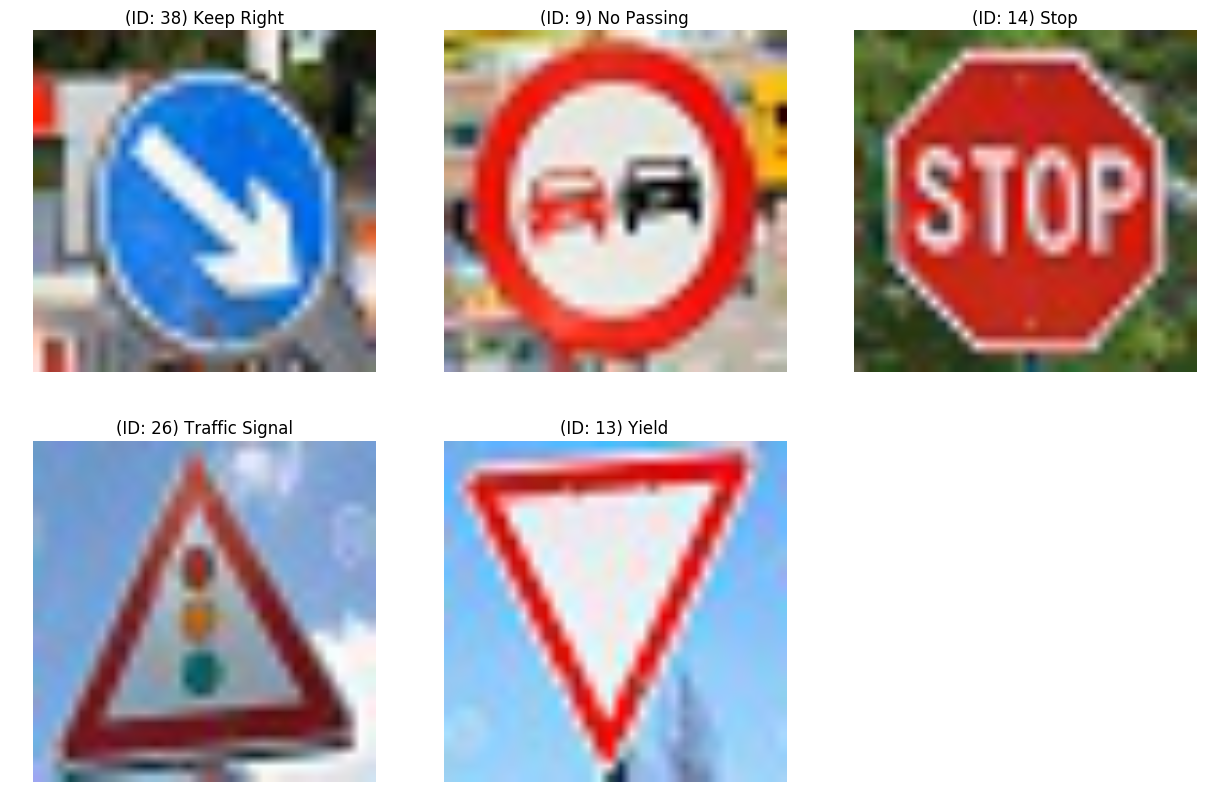

In [20]:
# Load in new test images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
%matplotlib inline

plt.figure(figsize = (15, 15))
i = 0
test_images = []
test_labels = [38, 9, 14, 26, 13]
test_image_titles = ["Keep Right", "No Passing", "Stop", "Traffic Signal", "Yield"]

for img in os.listdir("test_images/"):
    image = mpimg.imread("test_images/" + img, "rb")
    plt.subplot(3, 3, i+1).set_title("(ID: {}) ".format(test_labels[i]) + test_image_titles[i])
    plt.axis("off")
    plt.imshow(image)
    i += 1
    test_images.append(image)

In [21]:
# Processes test images to grayscale
test_images_gray = np.mean(test_images, axis=3, dtype=int)
test_images_gray.resize([test_images_gray.shape[0],test_images_gray.shape[1],test_images_gray.shape[2],1])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Some qualities that might make the classification difficult:

- The picture quality is poor
- The picture might have more than one sign in it making it difficult for the model to correctly classify the picture (sign)
- The picutre of the sign might be one that wasn't included in the training of the model leading to inaccurate classification
- The picture could include characteristics that closely resembles another sign (i.e. keep right vs keep left)

In [22]:
# Evaluate the test images
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint("model/"))

    test_accuracy = evaluate(test_images_gray, test_labels)
    print("Test Accuracy = {:.2f}%".format(test_accuracy*100))

Test Accuracy = 100.00%


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

After loading my trained model to evaluate my new test images to their respective classification, my model correctly predicted every test image. (5 of 5 - 100%). When comparing the 100% test accuracy of the new images to the 90.36% test accuracy of the model's test dataset, I would say my model generalized pretty well on signs found in a real world situation. Please refer to the evaluation above and the top 5 prediction arrays/plots below for visualization.

Top Predicted Probabilities:
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  9.70908999e-01   1.03176245e-02   5.34822512e-03   4.71380912e-03
    2.60087382e-03]
 [  1.00000000e+00   2.80280812e-20   1.80514058e-20   1.12586753e-21
    1.08795657e-22]
 [  9.97276366e-01   2.72366521e-03   2.45125009e-09   2.36721732e-12
    1.51189486e-13]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]]
Top Predicted Class IDs:
[[38  0  1  2  3]
 [ 9 16 10 17 14]
 [14 34 13  1 17]
 [26 18 27 22 24]
 [13  0  1  2  3]]


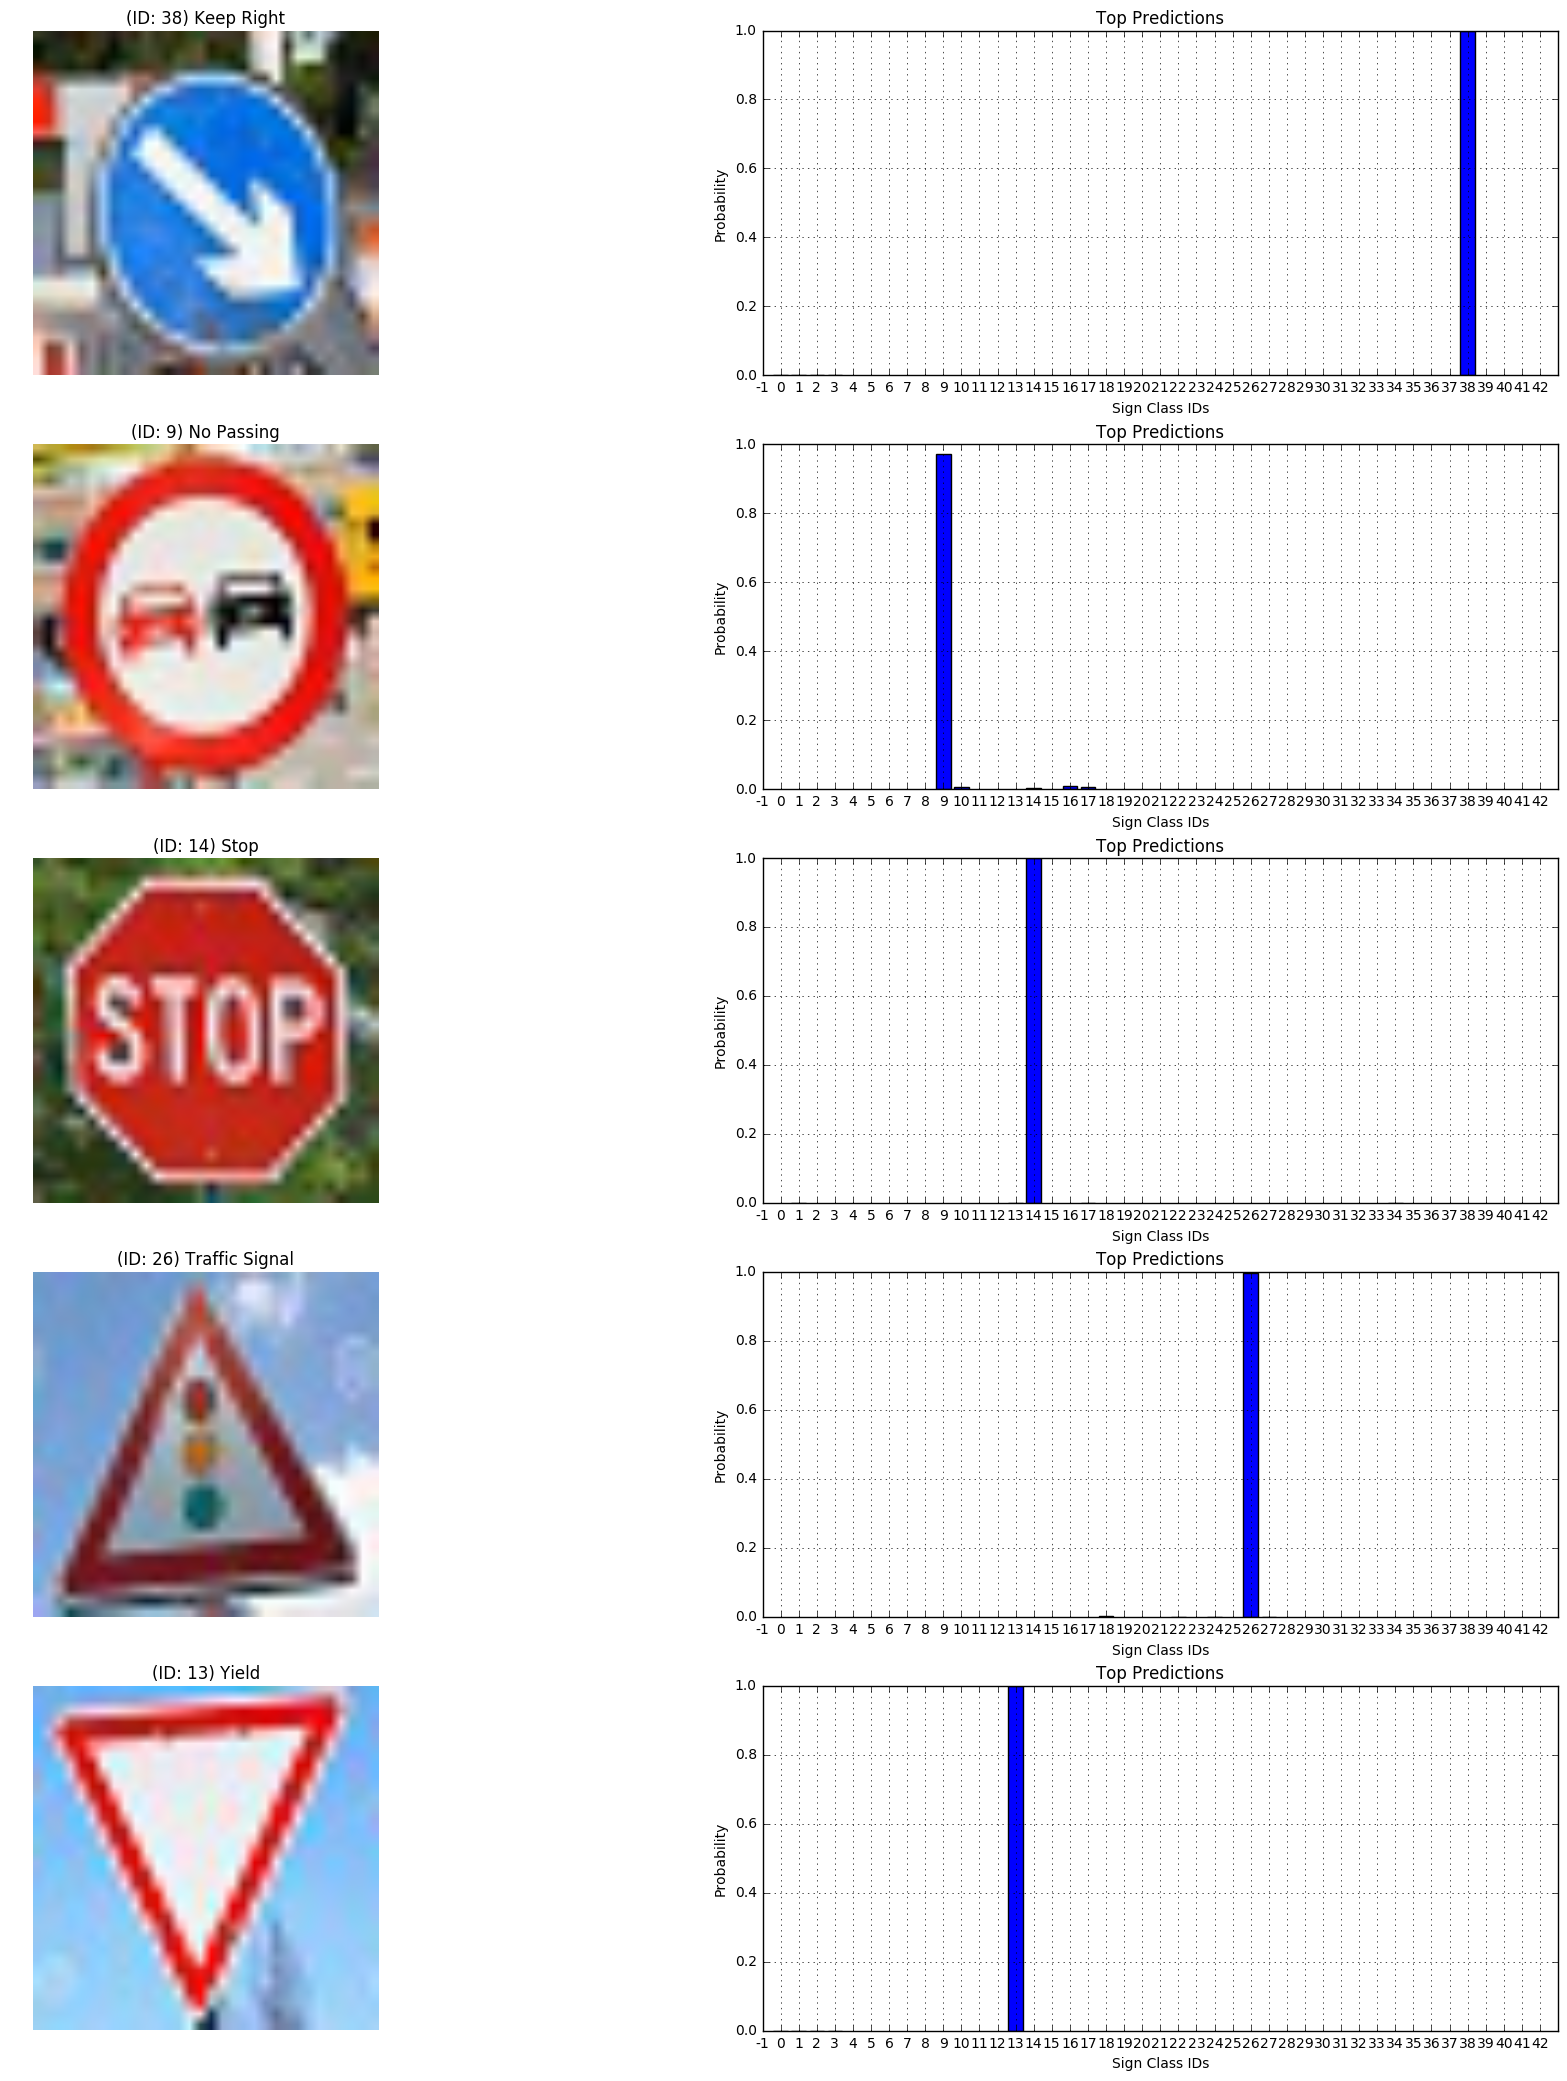

In [23]:
# Visualize the softmax probabilities
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint("model/"))
    top_prob = sess.run(tf.nn.top_k(softmax, k=5).values, feed_dict={x: test_images_gray, keep_prob: 1.0})
    top_class = sess.run(tf.nn.top_k(softmax, k=5).indices, feed_dict={x: test_images_gray, keep_prob: 1.0})
    print("Top Predicted Probabilities:")
    print(top_prob)
    print("Top Predicted Class IDs:")
    print(top_class)
    
    plt.figure(figsize = (20, 20))
    i = 0
    
    for img in test_images:
        plt.subplot(5, 2, 2*i+1).set_title("(ID: {}) ".format(test_labels[i]) + test_image_titles[i])
        plt.axis("off")
        plt.imshow(img)
        plt.subplot(5, 2, 2*i+2).set_title("Top Predictions")
        plt.subplot(5, 2, 2*i+2).set_ylim([0,1])
        plt.subplot(5, 2, 2*i+2).set_xlim([0,42])
        plt.xticks(np.arange(-1, 44), np.arange(-1,43))
        plt.xlabel("Sign Class IDs")
        plt.ylabel("Probability")
        plt.subplots_adjust(bottom=0.0, right=1.0, top=1.0)
        plt.grid(True)
        plt.bar(top_class[i], top_prob[i], align='center')
        i += 1

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

It appears that my model is certain of its predictions. The model predicted with 100% accuracy on the new images. Looking at the softmax values for the predictions, the "keep right" and "yield" signs appear to have the strongest certainty while the "no passing" sign had the weakest at ~97%. Even the weakest being ~97%, I'd say its still very certain.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.